In [1]:
# Import the necessary libraries
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('/content/KFC Dataset.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-04-14,1080.0,1080.0,1070.0,1070.0,735.970581,9000
1,2000-04-17,1070.0,1070.0,1070.0,1070.0,735.970581,2000
2,2000-04-18,1070.0,1070.0,1070.0,1070.0,735.970581,0
3,2000-04-19,1070.0,1070.0,1070.0,1070.0,735.970581,0
4,2000-04-20,1060.0,1060.0,1060.0,1060.0,729.092407,1000


In [3]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

In [4]:
# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

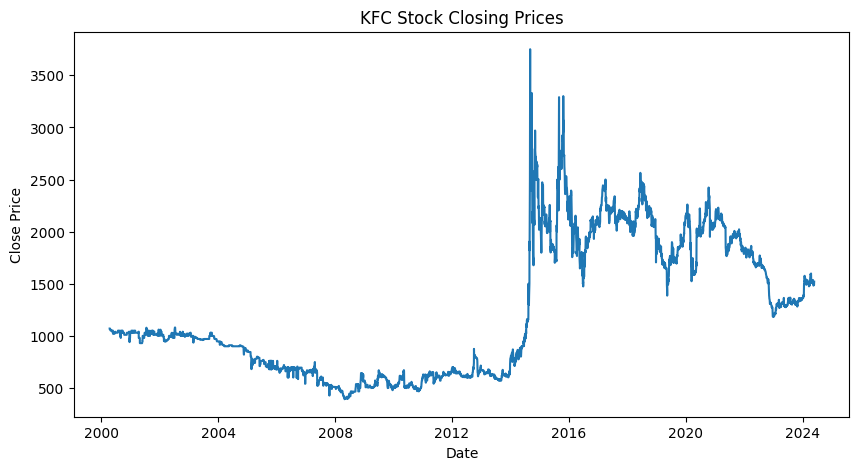

In [5]:
# Plotting the closing price
plt.figure(figsize=(10, 5))
plt.plot(data['Close'])
plt.title('KFC Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

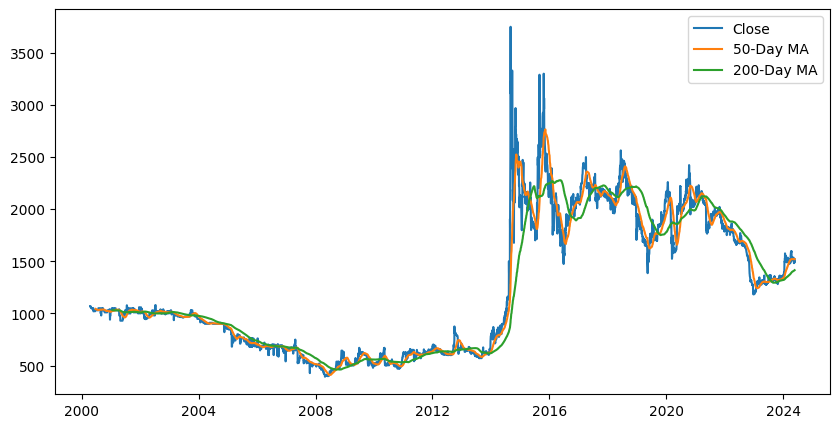

In [6]:
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
# Plotting moving averages
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.legend()
plt.show()

In [7]:
# Perform the ADF test on the 'Close' series
result = adfuller(data['Close'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.6472807856949119
p-value: 0.4584589587262821


In [8]:
# Difference the 'Close' series and perform the ADF test on the differenced series
data['Close_diff'] = data['Close'].diff().dropna()
result = adfuller(data['Close_diff'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -15.647622150991435
p-value: 1.6111949134183322e-28


In [16]:
# Fit the ARIMA model
model = ARIMA(data['Close'], order=(0, 1, 0))
fit_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [17]:
# Print the summary of the model
print(fit_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6025
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -30272.889
Date:                Thu, 13 Jun 2024   AIC                          60547.778
Time:                        17:22:57   BIC                          60554.482
Sample:                             0   HQIC                         60550.106
                               - 6025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1356.5729      3.940    344.285      0.000    1348.850    1364.296
Ljung-Box (L1) (Q):                  62.97   Jarque-Bera (JB):           1478747.49
Prob(Q):                              0.00   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


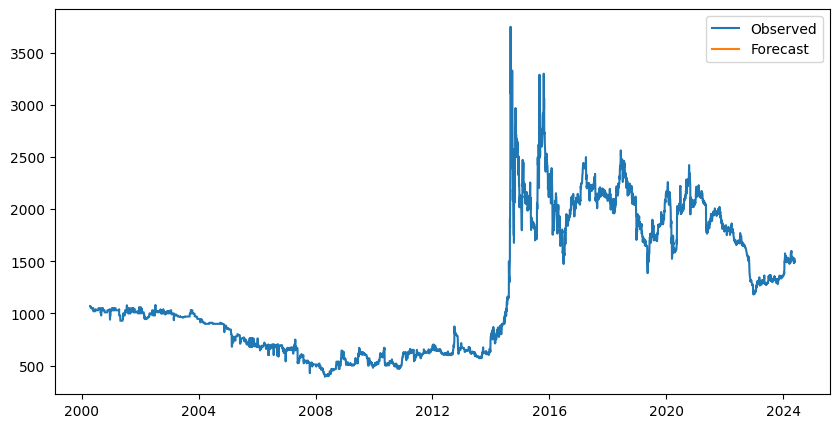

In [18]:
# Forecast future values
forecast_steps = 30  # Number of steps to forecast
forecast = fit_model.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1)
# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Observed')
plt.plot(forecast_df, label='Forecast')
plt.legend()
plt.show()